In [3]:
cd drive/My Drive/

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


In [4]:
cd Face-Recognition/

/content/drive/My Drive/Face-Recognition


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import sys
import os

In [65]:
image = cv2.imread('/content/drive/MyDrive/Face-Recognition/901607-friends-reunion-delayed-coronavirus-outbreak.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#haarcascade_frontalface_default.xml needs to be downloaded
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)
print("[INFO] Found {0} Faces.".format(len(faces)))
#saving every face detected
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

[INFO] Found 7 Faces.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True


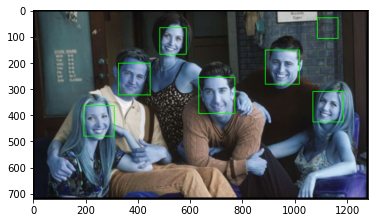

In [66]:
plt.imshow(image)

In [57]:
from keras.models import load_model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)
# make prediction to get embedding
#yhat = model.predict(samples)
# get embedding
#embedding = get_embedding(model, face_pixels)

def get_embedding(model, face_pixels):
	# scale pixel values
  face_pixels=cv2.imread(face_pixels)
  face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
	# transform face into one sample
  samples = np.expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
  yhat = model.predict(samples)
  return yhat[0]

[<tf.Tensor 'input_1_3:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/batchnorm_3/add_1:0' shape=(None, 128) dtype=float32>]


In [58]:
for name in os.listdir('images'):
  for image in os.listdir(os.path.join('images',name)):
      print(image)


monica_1.jpg
monica_2.jpg
monica_3.jpg
monica_4.jpg
monica_5.jpg
monica_6.jpg
monica_7.jpg
monica_8.jpg
chandler_1.jpg
chandler_2.jpg
chandler_3.jpg
chandler_4.jpg
chandler_5.jpg
chandler_6.jpg
chandler_7.jpg
chandler_8.jpg
rachelele_1.jpg
rachele_2.jpg
rachele_3.jpg
rachele_4.jpg
rachele_5.jpg
rachele_6.jpg
rachele_7.jpg
rachele_8.jpg


In [50]:
face_database = {}

for name in os.listdir('images'):
	for image in os.listdir(os.path.join('images',name)):
		identity = os.path.splitext(os.path.basename(image))[0]
		face_database[identity] = get_embedding(model,os.path.join('images',name,image))

print(face_database)

{'monica_1': array([-4.51359063e-01, -5.13001859e-01, -1.38629138e-01, -4.12457347e-01,
        1.01734471e+00,  9.93086621e-02, -2.81145513e-01,  8.74088984e-03,
        6.18623495e-02,  1.20525286e-02,  4.18839574e-01, -4.22038138e-01,
       -1.13477319e-01, -7.58691430e-01, -8.03860426e-01,  2.65931666e-01,
        3.92254353e-01, -5.86674511e-01,  2.87945390e-01, -6.09705925e-01,
        5.27233005e-01,  4.12003428e-01, -3.54422122e-01,  2.74744451e-01,
       -6.03137724e-03, -4.10678446e-01, -5.06920367e-02,  2.53984094e-01,
        1.22831017e-01, -2.73180485e-01,  9.14524347e-02, -2.19086334e-01,
        1.09299235e-01, -4.35909033e-01,  4.01146978e-01, -2.18875170e-01,
        9.21584547e-01,  1.35775685e-01,  3.61361682e-01, -1.85596928e-01,
        2.38637701e-01,  1.12377904e-01,  2.80006379e-01,  1.36052445e-01,
       -1.07295442e+00, -4.12348926e-01,  1.64392665e-01,  3.65363508e-02,
        1.72583848e-01,  4.27002192e-01, -4.45239604e-01,  8.68887663e-01,
        2.55

In [51]:
def find_face(image_path, database, model, threshold = 0.6):
  # find the face encodings for the input image
  #encoding = img_to_encoding(image_path, model)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  img=cv2.imread(image_path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  print(faces)

  min_dist = 99999
  # loop over all the recorded encodings in database 
  #for i in faces:
  #face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  identity='unknown'
  #img = cv2.imread('/content/drive/MyDrive/Face-Recognition/901607-friends-reunion-delayed-coronavirus-outbreak.jpg')
  #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for name in face_database:

    for (x,y,w,h) in faces:

      roi_img=img[y:y+h,x:x+w]
      encoding_pred=get_embedding(model,)




  for (x,y,w,h) in faces:
    #img = cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_img = img[y:y+h, x:x+w]
    #plt.imshow(roi_gray)
    #roi_color = img[y:y+h, x:x+w]
    for name in face_database:

      encoding = image_pred_to_encoding(roi_gray, model)
      # find the similarity between the input encodings and claimed person's encodings using L2 norm
      dist = np.linalg.norm(np.subtract(database[name], encoding) )
      # check if minimum distance or not
      if dist < min_dist:
            min_dist = dist
            identity = name
            print(min_dist)
            

      if min_dist > threshold:
        print("User not in the database.")
        identity = 'Unknown Person'
      else:
        print ("Hi! " + str(identity) + ", L2 distance: " + str(min_dist))
        
  return min_dist, identity

In [ ]:
for (name, encoded_image_name) in face_database.items():
      #distance between two embedding vector
			dist = np.linalg.norm(encoding - encoded_image_name)
			if(dist < min_dist):
				min_dist = dist
				identity = name
 #min distance signifies similar embedding and hence predicted person
 print('Min dist: ',min_dist)